In [1]:
!pip install requests matplotlib

Tracking ISS...


/var/folders/vg/spgql7vd59l4djjsm79b09mh0000gn/T/ipykernel_28332/1726256603.py:24: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  timestamps.append(datetime.utcfromtimestamp(timestamp).strftime('%H:%M:%S'))


1/100 | Latitude: -48.95, Longitude: 44.26, Time: 12:37:37
2/100 | Latitude: -48.69, Longitude: 45.31, Time: 12:37:49
3/100 | Latitude: -48.43, Longitude: 46.27, Time: 12:38:00
4/100 | Latitude: -48.17, Longitude: 47.21, Time: 12:38:11
5/100 | Latitude: -47.90, Longitude: 48.14, Time: 12:38:22
6/100 | Latitude: -47.60, Longitude: 49.15, Time: 12:38:34
7/100 | Latitude: -47.32, Longitude: 50.06, Time: 12:38:45
8/100 | Latitude: -47.00, Longitude: 51.04, Time: 12:38:57
9/100 | Latitude: -46.69, Longitude: 51.93, Time: 12:39:08
10/100 | Latitude: -46.38, Longitude: 52.81, Time: 12:39:19
11/100 | Latitude: -46.04, Longitude: 53.76, Time: 12:39:31
12/100 | Latitude: -45.71, Longitude: 54.62, Time: 12:39:42
13/100 | Latitude: -45.38, Longitude: 55.46, Time: 12:39:53
14/100 | Latitude: -45.01, Longitude: 56.37, Time: 12:40:05
15/100 | Latitude: -44.63, Longitude: 57.27, Time: 12:40:17
16/100 | Latitude: -44.21, Longitude: 58.23, Time: 12:40:30
17/100 | Latitude: -43.85, Longitude: 59.04, Time

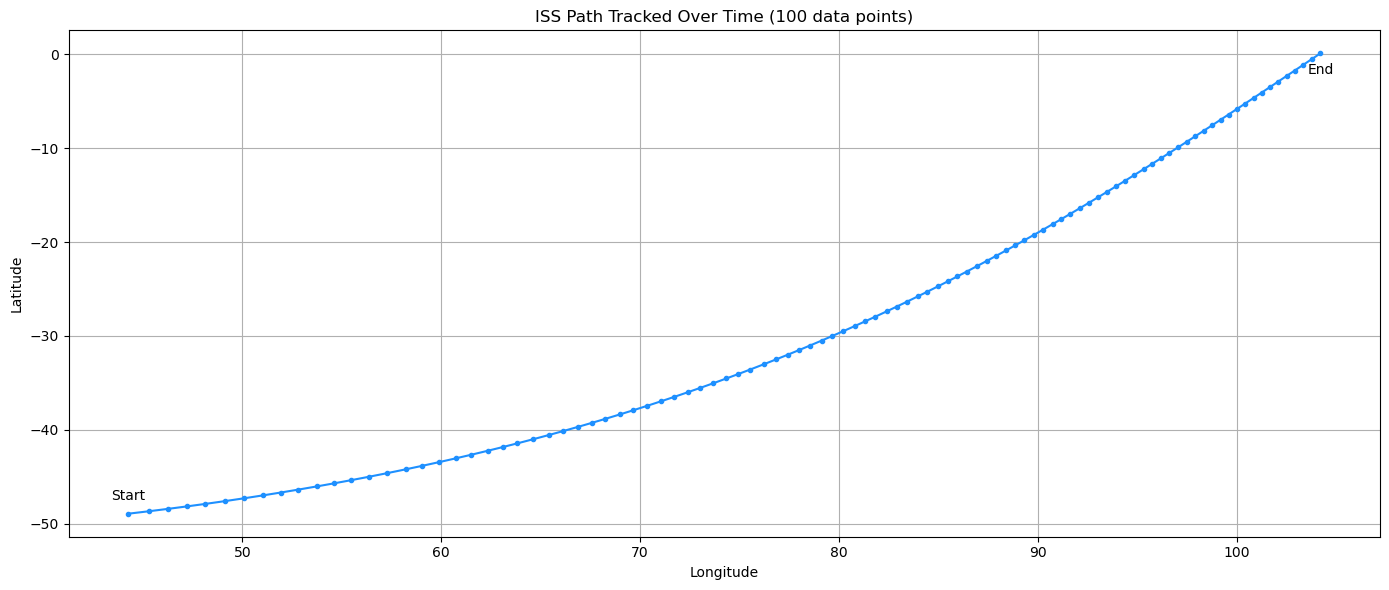

In [3]:
import requests
import time
import matplotlib.pyplot as plt
from datetime import datetime

latitudes = []
longitudes = []
timestamps = []

url = "https://api.wheretheiss.at/v1/satellites/25544"

print("Tracking ISS...")
for i in range(100):
    try:
        response = requests.get(url)
        data = response.json()

        lat = data['latitude']
        lon = data['longitude']
        timestamp = data['timestamp']

        latitudes.append(lat)
        longitudes.append(lon)
        timestamps.append(datetime.utcfromtimestamp(timestamp).strftime('%H:%M:%S'))

        print(f"{i+1}/100 | Latitude: {lat:.2f}, Longitude: {lon:.2f}, Time: {timestamps[-1]}")

        time.sleep(10)
    except Exception as e:
        print(f"Error: {e}")
        time.sleep(10)

plt.figure(figsize=(14, 6))
plt.plot(longitudes, latitudes, marker='o', markersize=3, linestyle='-', color='dodgerblue')
plt.title("ISS Path Tracked Over Time (100 data points)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)

plt.annotate("Start", (longitudes[0], latitudes[0]), textcoords="offset points", xytext=(0,10), ha='center')
plt.annotate("End", (longitudes[-1], latitudes[-1]), textcoords="offset points", xytext=(0,-15), ha='center')

plt.tight_layout()
plt.show()